##### Exploratory Data Analysis - 'members_v3.csv'

What we already know:

###### members.csv

User Information. 

Note that not every user in the dataset is available.

- msno: user id

- city

- bd: age (Note: This column has outlier values ranging from -7000 to 2015, please use your judgement.)

- gender

- registered_via: registration method

- registration_init_time: format %Y%m%d

- (removed) expiration_date: format %Y%m%d, taken as a snapshot at which the member.csv is extracted. Not representing the actual churn behavior.

###### members_v3.csv

Refreshed 11/13/2017, replaces members.csv data with the expiration date data removed.

In [1]:
# import libraries

import numpy as np
import pandas as pd
import datetime as dt

import matplotlib.pyplot as plt
plt.style.use('ggplot')


In [2]:
# import the data

members_df = pd.read_csv("members_v3.csv")

In [3]:
# explore the members_df

members_df.head(25)

,msno,city,bd,gender,registered_via,registration_init_time
0,Rb9UwLQTrxzBVwCB6+bCcSQWZ9JiNLC9dXtM1oEsZA8=,1,0,NaN,11,20110911
1,+tJonkh+O1CA796Fm5X60UMOtB6POHAwPjbTRVl/EuU=,1,0,NaN,7,20110914
2,cV358ssn7a0f7jZOwGNWS07wCKVqxyiImJUX6xcIwKw=,1,0,NaN,11,20110915
3,9bzDeJP6sQodK73K5CBlJ6fgIQzPeLnRl0p5B77XP+g=,1,0,NaN,11,20110915
4,WFLY3s7z4EZsieHCt63XrsdtfTEmJ+2PnnKLH5GY4Tk=,6,32,female,9,20110915
5,yLkV2gbZ4GLFwqTOXLVHz0VGrMYcgBGgKZ3kj9RiYu8=,4,30,male,9,20110916
6,jNCGK78YkTyId3H3wFavcBLDmz7pfqlvCfUKf4G1Lw4=,1,0,NaN,7,20110916
7,WH5Jq4mgtfUFXh2yz+HrcTXKS4Oess4k4W3qKolAeb0=,5,34,male,9,20110916
8,tKmbR4X5VXjHmxERrckawEMZ4znVy1lAQIR1vV5rdNk=,5,19,male,9,20110917
9,I0yFvqMoNkM8ZNHb617e1RBzIS/YRKemHO7Wj13EtA0=,13,63,male,9,20110918


In [4]:
# print the shape

members_df.shape

(6769473, 6)

We observe that there are 6,769,473 observations in the members_v3.csv with 6 features for each observation.

In [5]:
# get the info

members_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6769473 entries, 0 to 6769472
Data columns (total 6 columns):
msno                      object
city                      int64
bd                        int64
gender                    object
registered_via            int64
registration_init_time    int64
dtypes: int64(4), object(2)
memory usage: 309.9+ MB


Users, by city: 

city
1     4804326
3       27282
4      246848
5      385069
6      135200
7       11610
8       45975
9       47639
10      32482
11      47489
12      66843
13     320978
14      89940
15     190213
16       5092
17      27772
18      38039
19       1199
20       4233
21      30837
22     210407
Name: msno, dtype: int64

Figure One - Users, by city: 



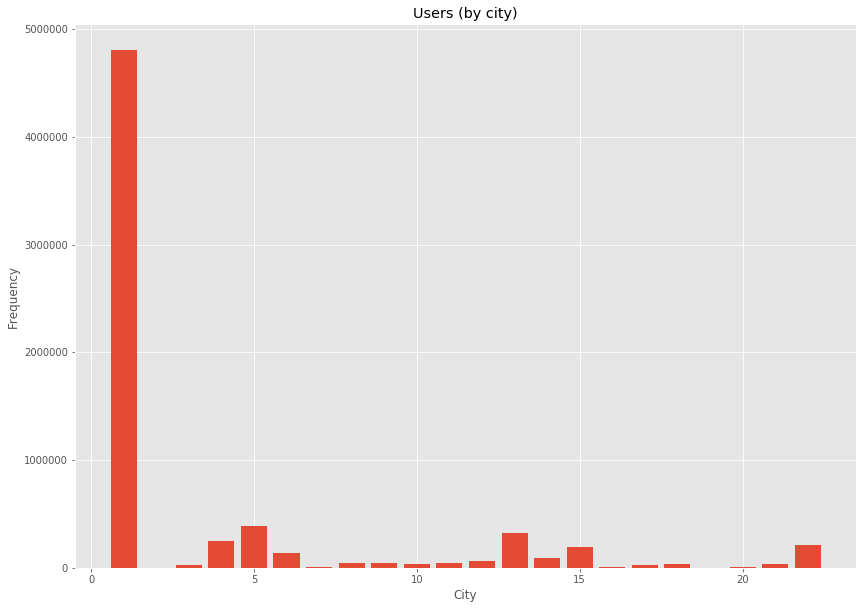

In [6]:
# let's figure out the count by each 'city'

print("Users, by city: " + "\n")
by_city = members_df.groupby(['city'])['msno'].count()

print(by_city)

# plot the figure

print("\n" + "Figure One - Users, by city: " + "\n")

plt.figure(figsize = (14, 10))
plt.title('Users (by city)')
plt.xlabel("City")
plt.ylabel("Frequency")
plt.bar(by_city.index, by_city.values)
plt.show()

We observe that most of the users belong to a single city denoted by '1'.

'city' is a categorical variable.

In [7]:
# explore the members dataframe with respect to 'age'

print(members_df.bd.describe())

print(members_df.groupby(['bd'])['bd'].count())

count    6.769473e+06
mean     9.795794e+00
std      1.792590e+01
min     -7.168000e+03
25%      0.000000e+00
50%      0.000000e+00
75%      2.100000e+01
max      2.016000e+03
Name: bd, dtype: float64
bd
-7168    1
-6998    1
-6807    1
-6445    1
-5978    1
-3152    1
-2828    1
-1970    1
-974     1
-958     1
-956     1
-951     1
-540     1
-529     1
-527     1
-526     2
-525     1
-524     1
-523     5
-522     2
-521     2
-520     1
-519     6
-518     5
-517     5
-516     6
-515     3
-514     4
-513     2
-512     1
        ..
 1049    2
 1050    1
 1051    3
 1052    4
 1053    1
 1056    1
 1058    1
 1061    1
 1062    1
 1064    1
 1089    1
 1111    1
 1213    1
 1309    1
 1421    1
 1501    1
 1819    1
 1820    2
 1821    1
 1937    1
 1946    1
 1949    1
 1954    1
 1958    1
 1968    1
 1970    1
 2009    1
 2011    2
 2014    1
 2016    1
Name: bd, Length: 386, dtype: int64


We observe that the feature 'bd' (age) has values that are unreasonable

In [8]:
# remove the unreasonable values and explore

members_corrected_age_df = members_df[np.logical_not(np.logical_or(members_df['bd'] <= 0, members_df['bd'] > 100))]

# explore of the corrected_age members dataframe

members_corrected_age_df.shape

(2223607, 6)

We observe that out of the 6,769,473 observations, only ~ 2,223,607 has reasonable (0 - 100] values for 'bd' (age).

Figure Two: Users, by age: 



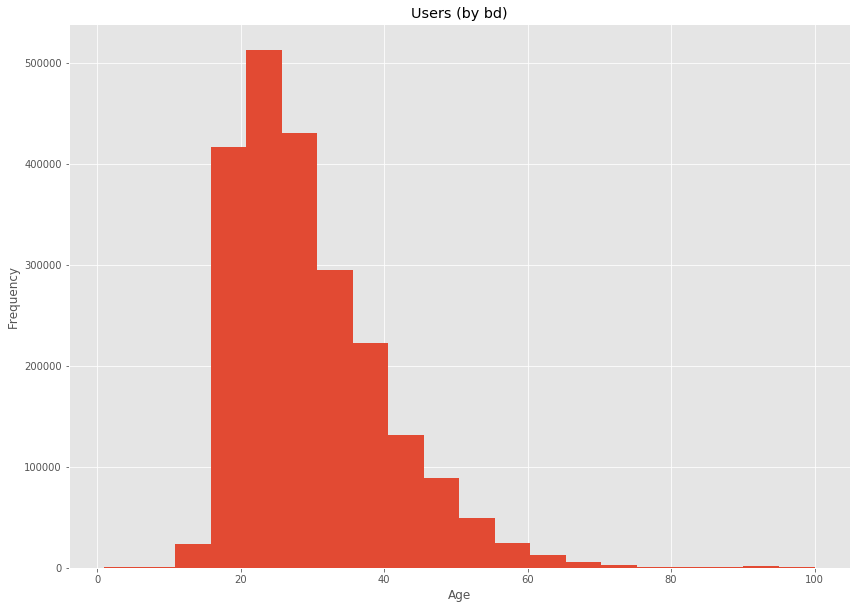

In [9]:
# plot the histogram of users, by age

print("Figure Two: Users, by age: " + "\n")

plt.figure(figsize = (14, 10))
plt.title("Users (by bd)")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.hist(members_corrected_age_df['bd'], bins = 20)
plt.show()

We observe that most of the users have the 'bd' (age) between ~ (16, 40)

In [10]:
# explore the members dataframe with respect to gender

print(members_df.groupby('gender')['gender'].count())

print("\n" + "Observations with 'NaN' or null values: " + "\n")
print(sum(members_df['gender'].isnull()))

gender
female    1144613
male      1195355
Name: gender, dtype: int64

Observations with 'NaN' or null values: 

4429505


We observe that out of the 6,769,473 observations, 4,429,505 are without the 'gender' details.

Furthermore, we see that we have equitable distribution between 'male' and 'female' observations where the value is not 'NaN'.

registered_via
-1           1
 1          43
 2        1452
 3     1643208
 4     2793213
 5        3115
 6        1213
 7      805895
 8        3982
 9     1482863
 10         10
 11      25047
 13       5455
 14        615
 16        888
 17       1494
 18          5
 19        974
Name: registered_via, dtype: int64

Figure Three - Users, by registered_via: 



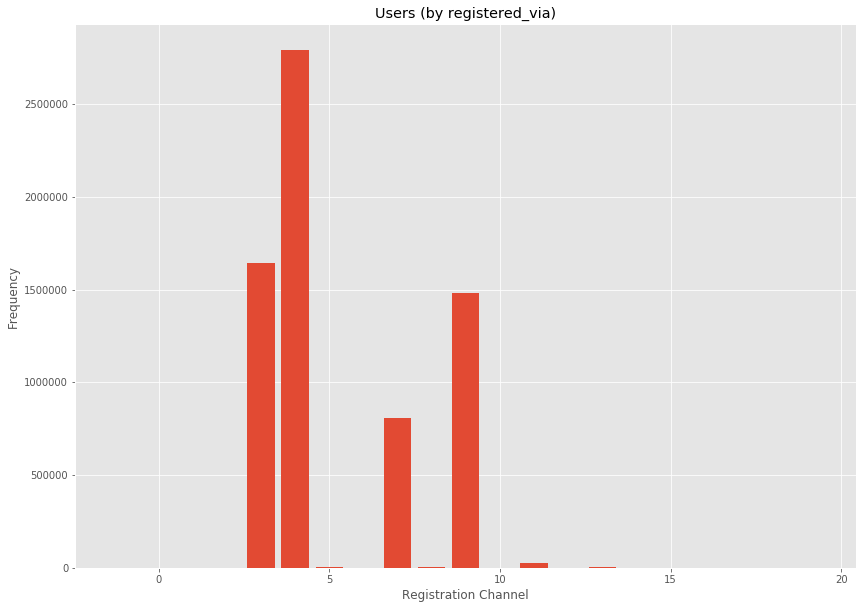

In [11]:
# explore the dataset with respect to 'registered_via' feature

by_registered_via = members_df.groupby(['registered_via'])['registered_via'].count()

print(by_registered_via)

# plot the figure

print("\n" + "Figure Three - Users, by registered_via: " + "\n")

plt.figure(figsize = (14, 10))
plt.title('Users (by registered_via)')
plt.xlabel("Registration Channel")
plt.ylabel("Frequency")
plt.bar(by_registered_via.index, by_registered_via.values)
plt.show()

We observe that we have ~ 17 different channels through which a user can register.

Most of the users have registered via channels 3, 4, 7, and 9.

In [12]:
# explore the dataset with respect to registration_init_time feature

members_df['registration_init_date'] = pd.to_datetime(members_df['registration_init_time'], format = '%Y%m%d')

In [13]:
# plot the users by registration initial date

by_initial_date = members_df.groupby(['registration_init_date'])['registration_init_date'].count()

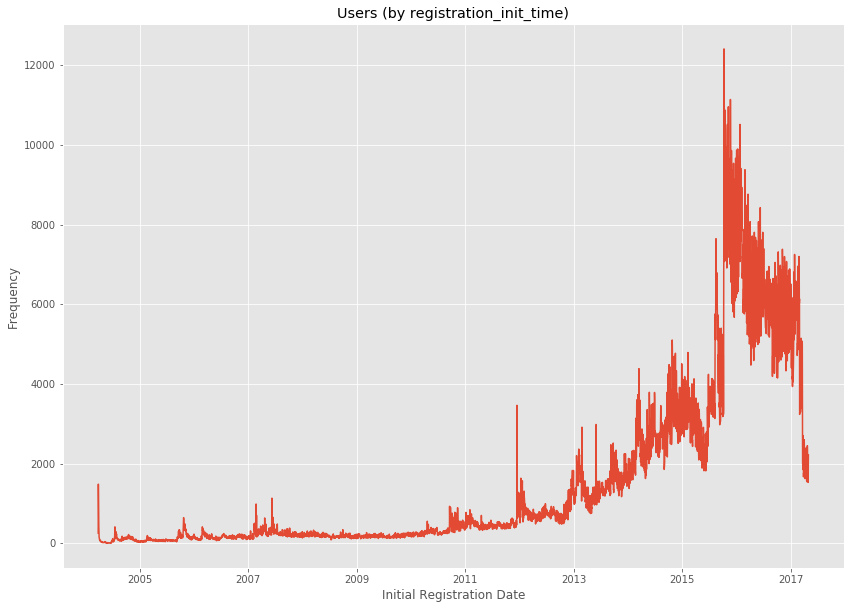

In [14]:
plt.figure(figsize = (14, 10))
plt.title("Users (by registration_init_time)")
plt.xlabel('Initial Registration Date')
plt.ylabel('Frequency')
plt.plot(by_initial_date.index, by_initial_date.values)
plt.show()

We observe an overall increasing trend in user registrations.

We find that the increase in the registration was the highest ~ beginning of 2016, with decline ~ beginning of 2017.